In [1]:
import sounddevice as sd
import os
import wavio
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from modules.pre_processing.scripts.pre_processing_data import AudioDataPreProcessor
import numpy as np
from modules.extracting_feature.scripts.extract_statistic_features import StatisticFeatureExtraction
import numpy as np
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model
import sounddevice as sd
import wavio
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd


In [2]:
class EmotionRecognition:
    def __init__(self, model_path, scaler_path, emotion_classes):
        self.model_path = model_path
        self.scaler_path = scaler_path
        self.emotion_classes = emotion_classes
        self.model = load_model(model_path)
        self.scaler = self.load_scaler(scaler_path)
        
    def plot_and_play_audio(self, file_name):
        data, sr = librosa.load(file_name, sr=None)
        ipd.display(ipd.Audio(data, rate=sr))
        plt.figure(figsize=(14, 5))
        plt.plot(data)
        plt.title('Waveform of the Recorded Audio')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude')
        plt.show()

    def load_scaler(self, scaler_file):
        return joblib.load(scaler_file)
    
    def preprocess_and_extract_features(self, file_path, base_cleaned_file_path):
        file_name = os.path.basename(file_path)
        audio_data_processor = AudioDataPreProcessor("./data/test_data/", base_cleaned_file_path)
        audio_data_processor.process_file(file_path, base_cleaned_file_path)
        cleaned_file_path = f'{base_cleaned_file_path}/{file_name}'
        self.plot_and_play_audio(cleaned_file_path)

        statistic_feature_extractor = StatisticFeatureExtraction(26)
        features = statistic_feature_extractor._feature_engineering_for_file(cleaned_file_path)
        feature_arr = np.array(list(features.values())).reshape(1, -1)
        
        return feature_arr

    def scale_features(self, feature_arr):
        return self.scaler.transform(feature_arr)
    
    def predict_emotions(self, scaled_arr):
        scaled_arr = np.expand_dims(scaled_arr, axis=2)
        predictions = self.model.predict(scaled_arr)
        top_3_indices = np.argsort(predictions[0])[-3:][::-1]
        top_3_emotions = [(self.emotion_classes[i], predictions[0][i]) for i in top_3_indices]
        return top_3_emotions
    
    def recognize_emotion(self, file_path, base_cleaned_path):
        self.plot_and_play_audio(file_path)

        feature_arr = self.preprocess_and_extract_features(file_path, base_cleaned_path)
        scaled_arr = self.scale_features(feature_arr)
        top_3_emotions = self.predict_emotions(scaled_arr)
        
        for emotion, score in top_3_emotions:
            print(f'Emotion: {emotion}, Score: {score:.4f}')

In [3]:
emotion_classes = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']
model_path = "models/best_fine_tuned_model.keras"
scaler_path = "models/best_fine_tuned_scaler.pkl"
emotion_recognition = EmotionRecognition(model_path, scaler_path, emotion_classes)

In [4]:
base_raw_path = './data/test_data/raw_data/'
base_cleaned_path = './data/test_data/cleaned_data/'

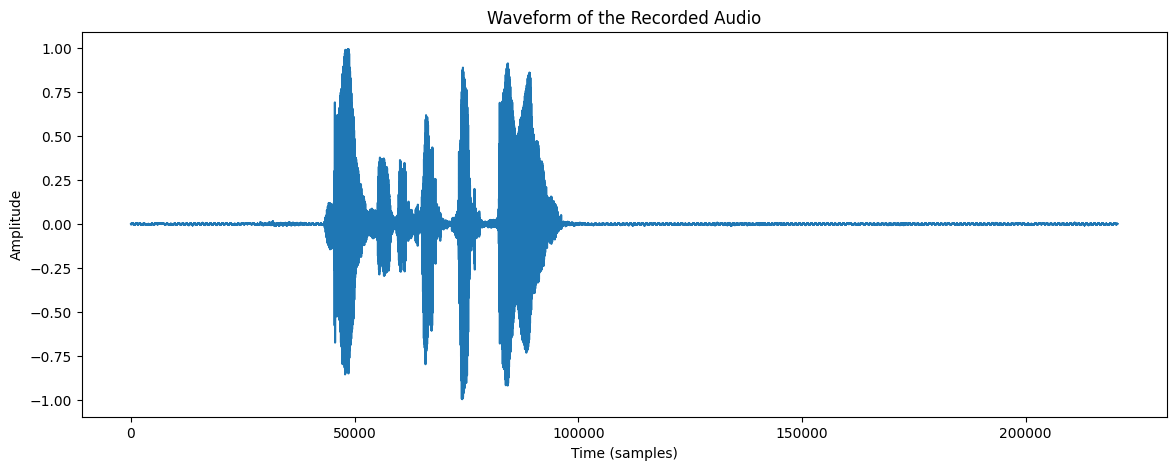

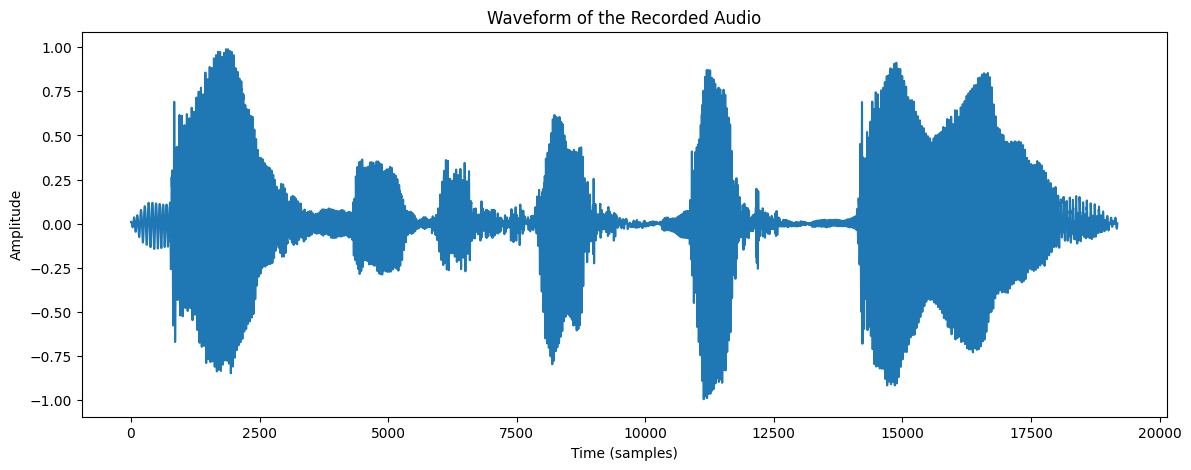

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Emotion: Angry, Score: 0.7711
Emotion: Neutral, Score: 0.0846
Emotion: Surprised, Score: 0.0417


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
file_name = f'{base_raw_path}/angry.wav'
emotion_recognition.recognize_emotion(file_path=file_name, base_cleaned_path=base_cleaned_path)

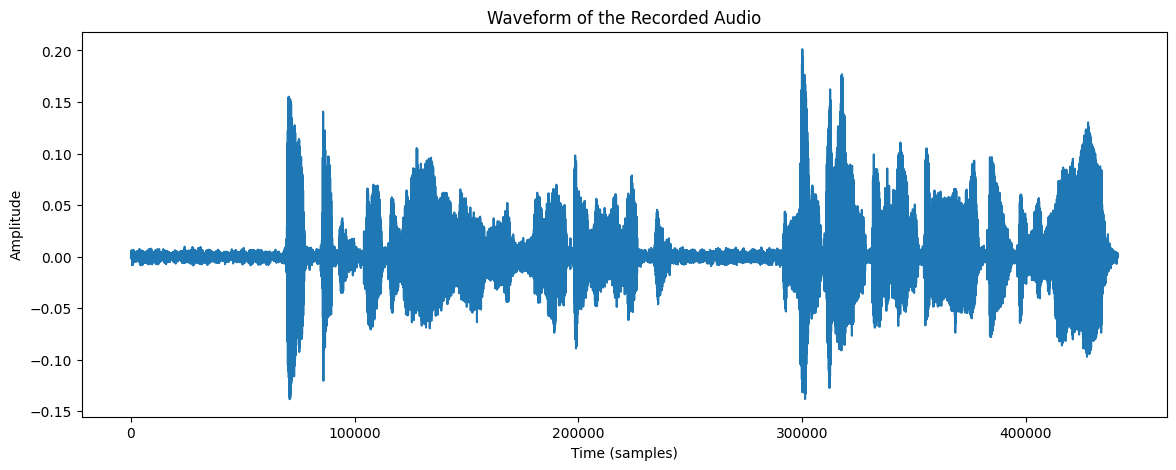

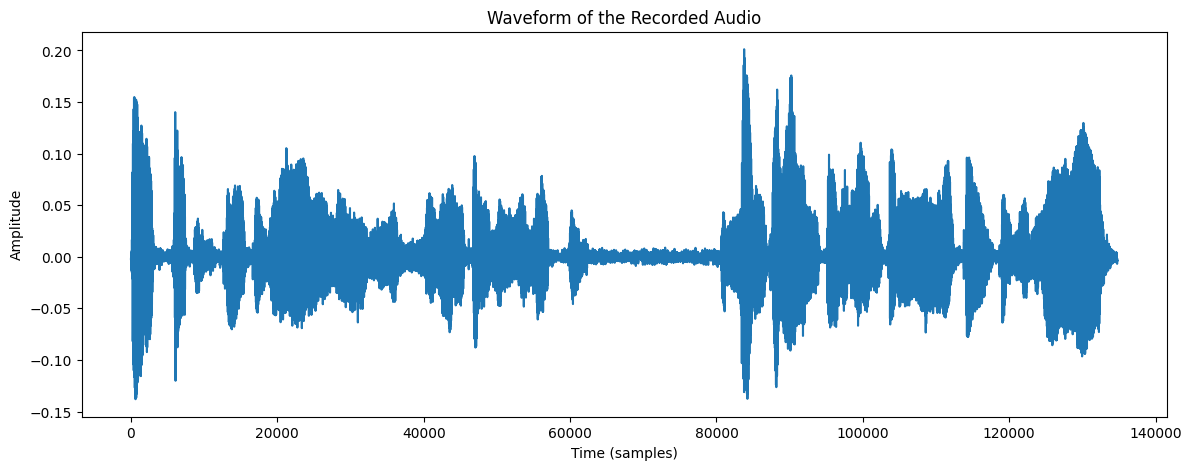

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Emotion: Disgusted, Score: 0.5536
Emotion: Happy, Score: 0.2029
Emotion: Surprised, Score: 0.1685


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
file_name = f'{base_raw_path}/disgusted.wav'
emotion_recognition.recognize_emotion(file_path=file_name, base_cleaned_path=base_cleaned_path)

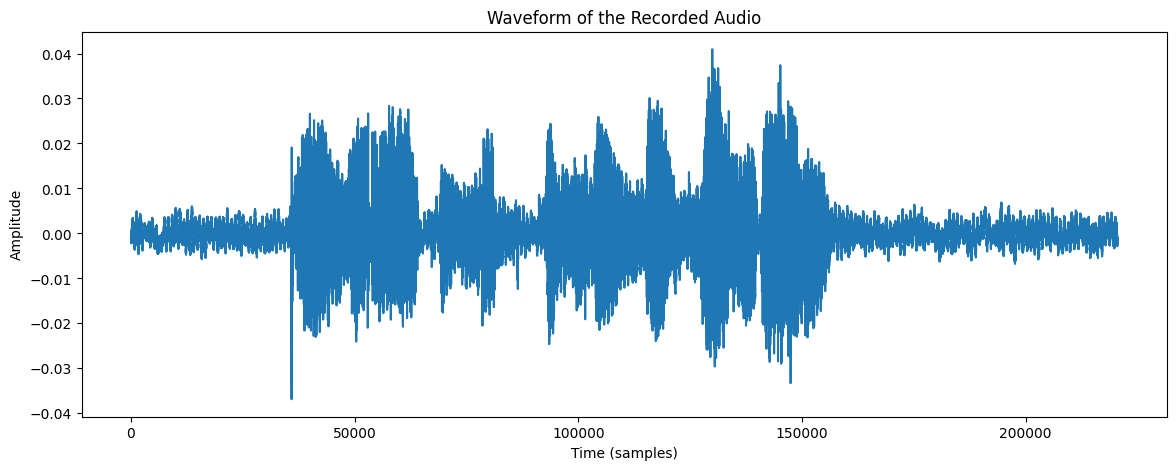

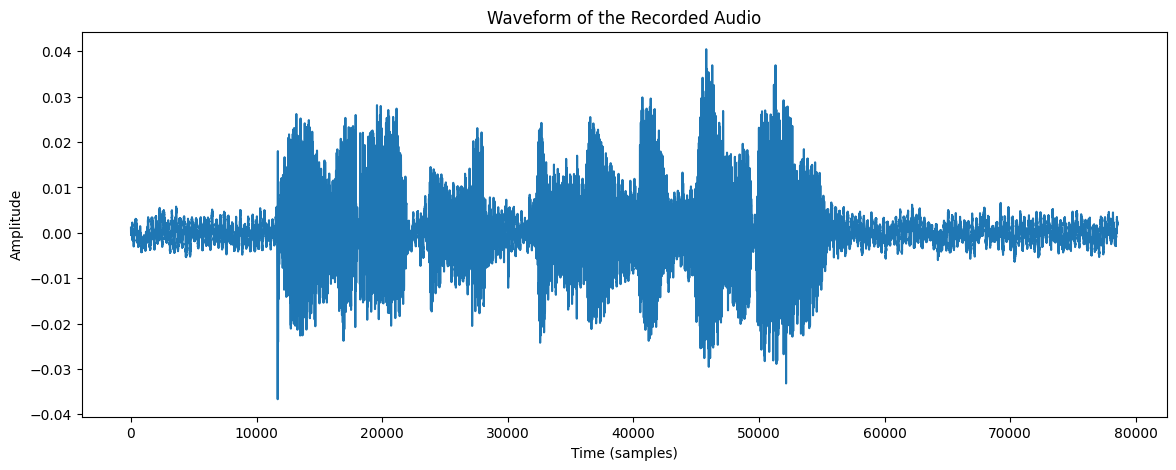

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Emotion: Fearful, Score: 0.6301
Emotion: Sad, Score: 0.2729
Emotion: Surprised, Score: 0.0504


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
file_name = f'{base_raw_path}/fearful.wav'
emotion_recognition.recognize_emotion(file_path=file_name, base_cleaned_path=base_cleaned_path)

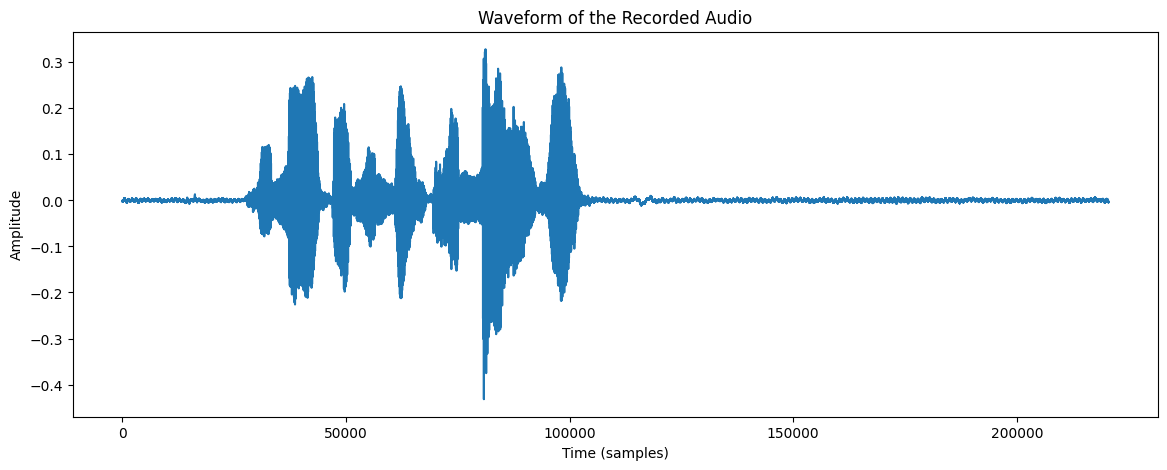

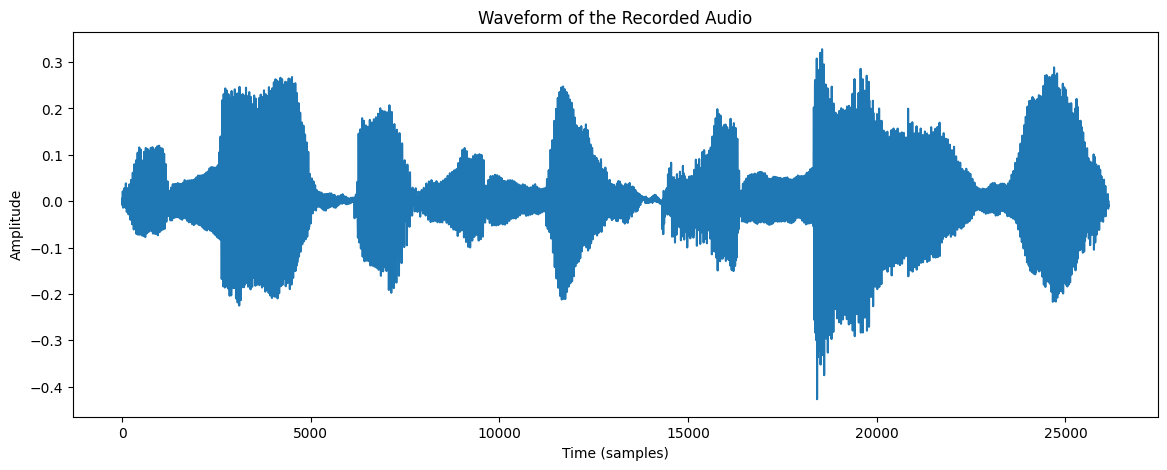

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Emotion: Happy, Score: 0.4784
Emotion: Surprised, Score: 0.2280
Emotion: Angry, Score: 0.1751


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
file_name = f'{base_raw_path}/happy.wav'
emotion_recognition.recognize_emotion(file_path=file_name, base_cleaned_path=base_cleaned_path)

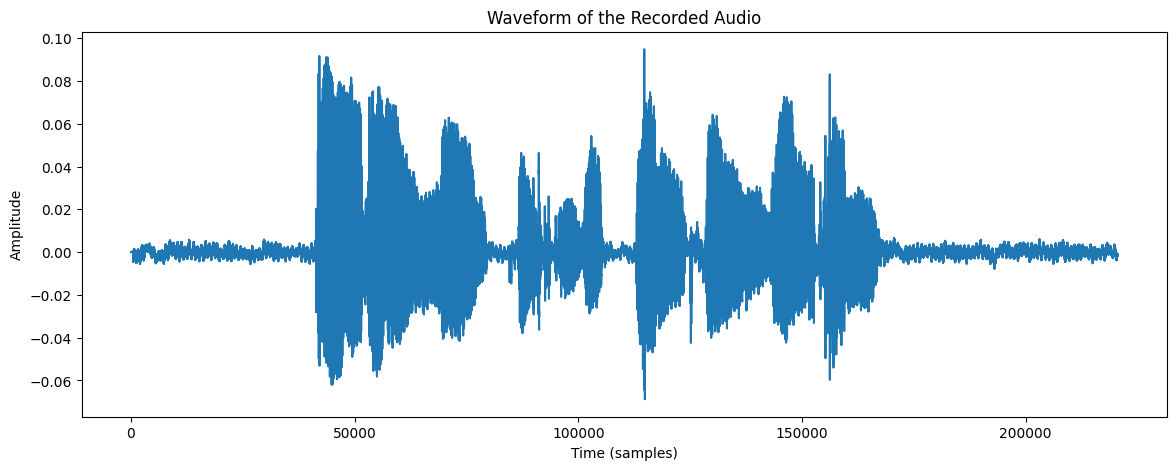

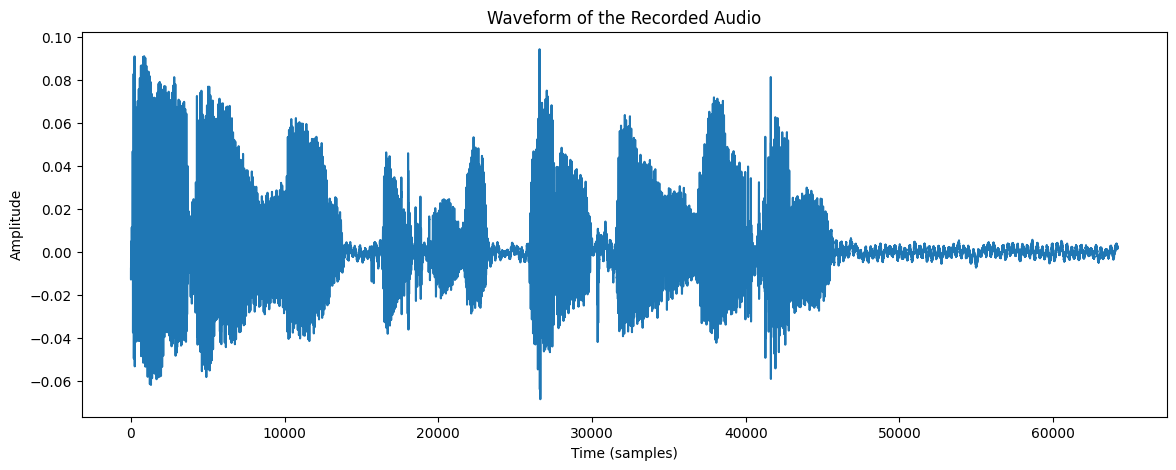

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Emotion: Neutral, Score: 0.6375
Emotion: Sad, Score: 0.1500
Emotion: Fearful, Score: 0.0797


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
file_name = f'{base_raw_path}/neutral.wav'
emotion_recognition.recognize_emotion(file_path=file_name, base_cleaned_path=base_cleaned_path)

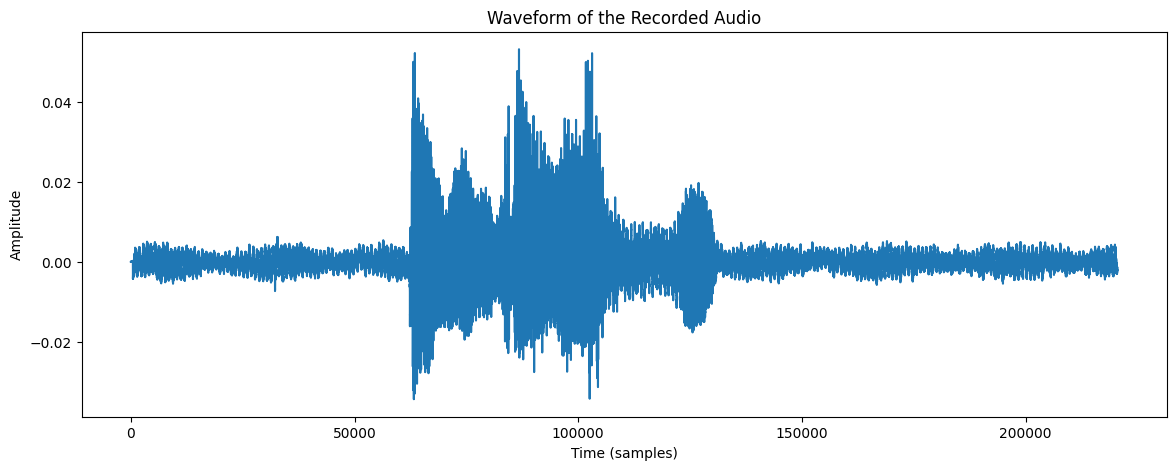

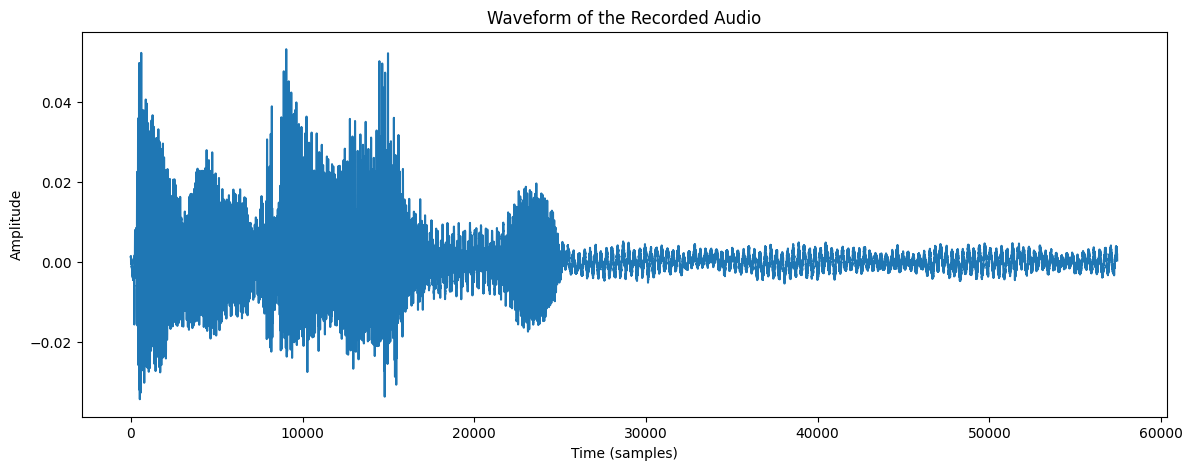

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Emotion: Sad, Score: 0.5330
Emotion: Fearful, Score: 0.3804
Emotion: Neutral, Score: 0.0311


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
file_name = f'{base_raw_path}/sad.wav'
emotion_recognition.recognize_emotion(file_path=file_name, base_cleaned_path=base_cleaned_path)

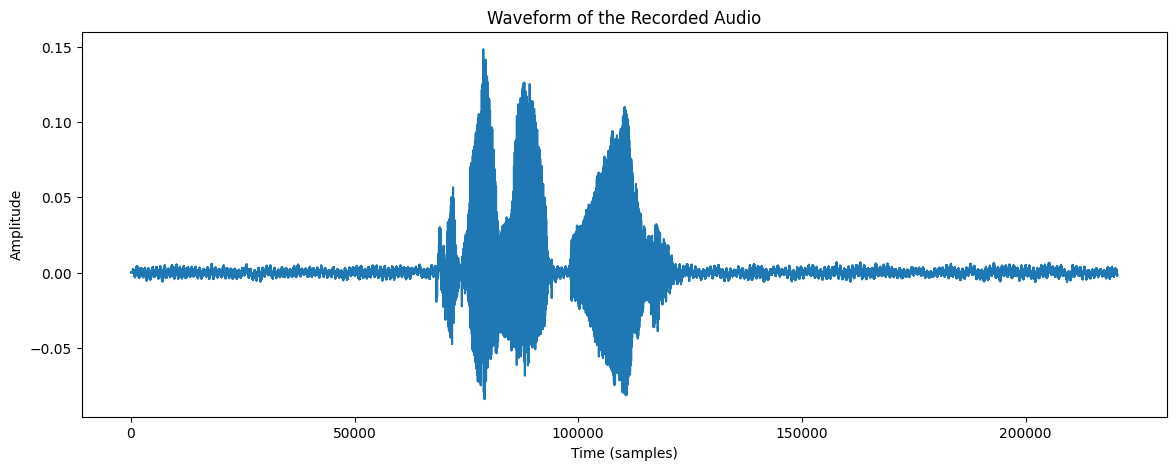

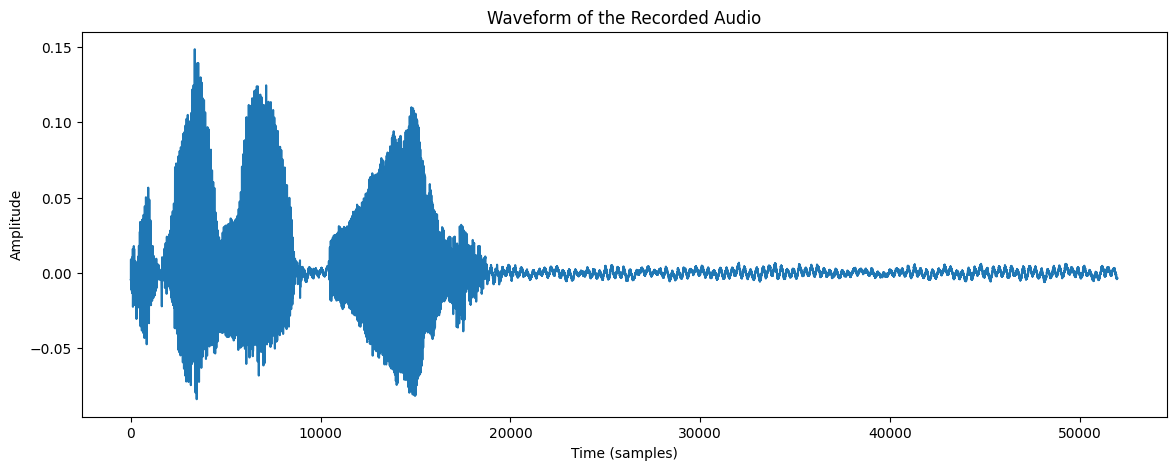

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Emotion: Surprised, Score: 0.5569
Emotion: Disgusted, Score: 0.1896
Emotion: Fearful, Score: 0.1593


d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
file_name = f'{base_raw_path}/surprised.wav'
emotion_recognition.recognize_emotion(file_path=file_name, base_cleaned_path=base_cleaned_path)